<a href="https://colab.research.google.com/github/AnthonyGachuru/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/AnthonyG_LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t, ttest_1samp


##Load the Dataset

In [0]:
# the dataset
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                 header = None,
                names = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'], na_values = '?')
print(df.shape)

df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


##Clean the Dataset

In [4]:
#Remember to put in a dictionary
df = df.replace({'n': 0, 'y': 1})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [5]:
df.education.value_counts()

0.0    233
1.0    171
Name: education, dtype: int64

In [6]:
cleaned = df.education.dropna()
cleaned.head()

0    1.0
1    1.0
2    0.0
3    0.0
5    0.0
Name: education, dtype: float64

##FInd the Confidence Interval

In [0]:
def confidence_interval(data, confidence_level=0.95):
  sample_mean = np.mean(data)
  sample_size = len(data)
  sample_std_dev = np.std(data, ddof=1)
  standard_error = sample_std_dev / (sample_size**.5)
  margin_of_error = standard_error * stats.t.ppf((1+ confidence_level) / 2.0, sample_size - 1)
  return (sample_mean, sample_mean - margin_of_error, sample_mean + margin_of_error)

In [8]:
confidence_interval(cleaned)

(0.42326732673267325, 0.3748839176014873, 0.4716507358638592)

In [0]:
intervals = []
for issue in range(1,df.shape[1]):
  df1 = df
  df1 = df.iloc[:,issue].dropna()
  intervals.append(df1)

##Plot the Distribution

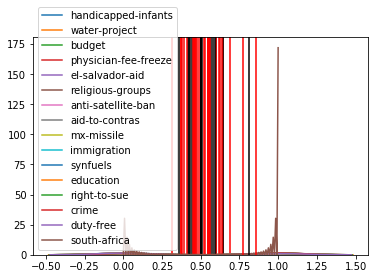

In [10]:
for edu in range(0, len(intervals)):
  sns.kdeplot(intervals[edu])
  CI = confidence_interval(intervals[edu])
  plt.axvline(x=CI[1], color='red')
  plt.axvline(x=CI[2], color='red')
  plt.axvline(x=CI[0], color='k');

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


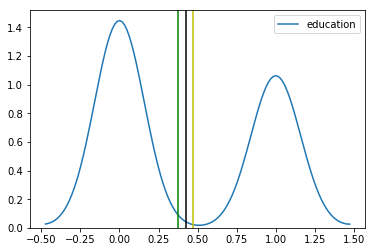

In [11]:
#For education
sns.kdeplot(df['education'])
CI = confidence_interval(df['education'])
plt.axvline(x=CI[1], color='green')
plt.axvline(x=CI[2], color='y')
plt.axvline(x=CI[0], color='k')

##Interpret the Confidence Interval

The confidence interval gives the upper and lower limits of the statistical significance of my t-test statistics.

If the Null Hypothesis falls between the confidence interval we fail to reject the null hypothesis.

If the Null Hypothesis falls outside of the confidence interval we can reject the null hypothesis.

##CHI-SQUARE TEST

In [16]:
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data

#Load dataset with categorical variables
df2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data', header=None)

df2 = df2.rename(columns = {28: 'Top_L', 29: 'Bottom_R'})

print(df2.shape)
df2.head()

(194, 30)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,Top_L,Bottom_R
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [17]:
contingency_table = pd.crosstab(df2['Top_L'], df2['Bottom_R'], margins=True)
contingency_table

Bottom_R,black,blue,brown,gold,green,orange,red,white,All
Top_L,,,,,,,,,
black,0,0,0,2,6,0,4,0,12
blue,0,24,0,1,2,0,15,1,43
gold,0,0,0,2,0,0,3,1,6
green,0,4,1,2,13,1,10,1,32
orange,0,1,0,0,2,0,1,0,4
red,9,4,0,0,14,0,26,3,56
white,0,14,1,2,3,0,10,11,41
All,9,47,2,9,40,1,69,17,194


In [0]:
row_sums = contingency_table.iloc[0:7, 8].values
col_sums = contingency_table.iloc[7, 0:8].values
total = contingency_table.loc['All','All']
# row and col sums are lists of sums for each row and column. Total is all data.

In [0]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
#     Producing list expected_row
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
#   Producing list of lists
expected = np.array(expected)

In [21]:
observed = pd.crosstab(df2['Top_L'], df2['Bottom_R']).values
observed

array([[ 0,  0,  0,  2,  6,  0,  4,  0],
       [ 0, 24,  0,  1,  2,  0, 15,  1],
       [ 0,  0,  0,  2,  0,  0,  3,  1],
       [ 0,  4,  1,  2, 13,  1, 10,  1],
       [ 0,  1,  0,  0,  2,  0,  1,  0],
       [ 9,  4,  0,  0, 14,  0, 26,  3],
       [ 0, 14,  1,  2,  3,  0, 10, 11]])

In [22]:
chi_squared = ((observed - expected)**2/(expected)).sum()
degrees_of_freedom = (len(row_sums)-1)*(len(col_sums)-1)
print(f'Chi Squared: {chi_squared} \nDegrees of Freedom: {degrees_of_freedom}')

Chi Squared: 129.2973238309999 
Degrees of Freedom: 42


In [23]:
chi_squared, p_value, degrees_of_freedom, expected = stats.chi2_contingency(observed)
print(f'Chi Squared: {chi_squared}\nP-value: {p_value}\nDegrees of Freedom: {degrees_of_freedom}\nExpected: {expected}')

Chi Squared: 129.2973238309999
P-value: 8.038525286854991e-11
Degrees of Freedom: 42
Expected: [[ 0.55670103  2.90721649  0.12371134  0.55670103  2.4742268   0.06185567
   4.26804124  1.05154639]
 [ 1.99484536 10.41752577  0.44329897  1.99484536  8.86597938  0.22164948
  15.29381443  3.76804124]
 [ 0.27835052  1.45360825  0.06185567  0.27835052  1.2371134   0.03092784
   2.13402062  0.5257732 ]
 [ 1.48453608  7.75257732  0.32989691  1.48453608  6.59793814  0.16494845
  11.3814433   2.80412371]
 [ 0.18556701  0.96907216  0.04123711  0.18556701  0.82474227  0.02061856
   1.42268041  0.35051546]
 [ 2.59793814 13.56701031  0.57731959  2.59793814 11.54639175  0.28865979
  19.91752577  4.90721649]
 [ 1.90206186  9.93298969  0.42268041  1.90206186  8.45360825  0.21134021
  14.58247423  3.59278351]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)